In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [35]:
data =  pd.read_csv("kaggle_data\DailyDelhiClimateTrain.csv")

In [41]:
data.head()
data["date"] = pd.to_datetime(data["date"])


## Introduction

This is a daily measures of Dehli weather over four years, with mean temp as the parameter of interest.  
The main aim is to replicate FPP3 exercises using this as the sample data  
Chapter 2 is based on time series graphics  

## Time Plot

Text(0.5, 1.0, 'Mean temperature in New Dehli')

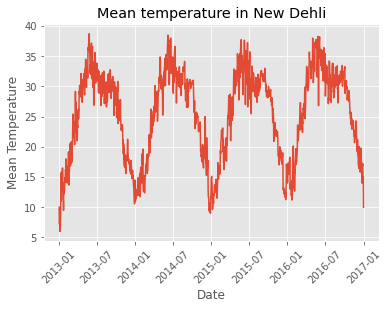

In [51]:
plt.style.use("ggplot")

plt.plot(data["date"], data["meantemp"])
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title("Mean temperature in New Dehli")

Simple time plot of mean temperature across time  
Some clear features of this include:
* Clear seasonality (annual)
* No clear trend

## Seasonal plots

Seasonal plot will be constructed for monthly data, however a similar method could be followed in order to see daily seasonality, weekly seasonality, etc

In [134]:
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.day

Text(0.5, 1.0, 'Mean temperature in Dehli across months')

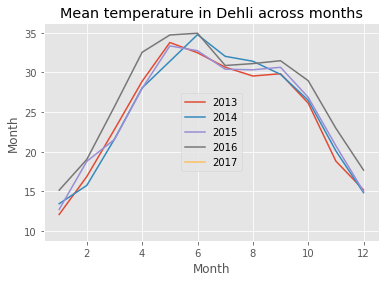

In [135]:
data3 = pd.DataFrame(data2.unstack("year"))

fig, ax = plt.subplots()

data2.unstack("year").plot(ax= ax)
ax.legend(loc = 'center')
ax.set_xlabel("Month")
ax.set_ylabel("Month")
ax.set_title("Mean temperature in Dehli across months")



With an annual seasonal period, it appears that temperature does spike towards months April to August ( where it is Summer )  
No other seasonalities are present

## Lag plots

Another way to identify seasonality is through lag plots  

Lag plots will plot the time series against its lagged values.  

The closer these values are to the y = x line, the closer these values are related for that specific seasonal period

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

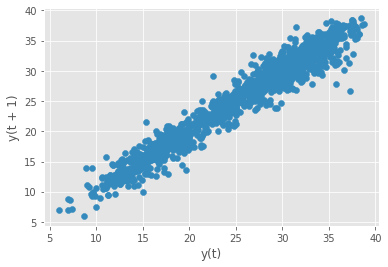

In [140]:
pd.plotting.lag_plot(data['meantemp'], lag=1)

# Clearly, there will exist similarity between daily data
# This is probably better applied on larger data time periods. 

## Auto correlation

Auto correlation describes the correlation between a time series and its lagged values.
The main question it aims to answer is:

**Do current observations have a linear relationship with past values?**


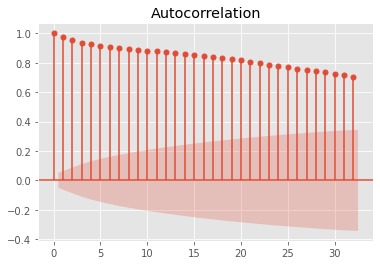

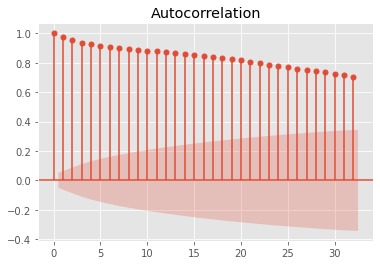

In [141]:
plot_acf(data["meantemp"]) 
# we expect very high correlation as the data here is daily

Here, both the auto correlation and lagplots show their current results because daily data is observed in a series which is highly dependant on its adjacent data points.  
E.g. The weather of one day is known to dictate the weather of the next